In [1]:
import pandas as pd

# Load the cleaned Excel file
df = pd.read_excel("new_data.xlsx")

# Check the first few rows
print(df.head())

# Check the shape (rows, columns)
print("Shape:", df.shape)

# Check missing values
print(df.isnull().sum())


   Unnamed: 0       UTM_X(m)      UTM_Y(m)    Market  ID Provider  \
0           1  -77655.120737  4.156988e+06  Regional   1      DOW   
1           2   15716.106022  4.245407e+06  Regional   2      DOW   
2           3   61426.074852  4.291651e+06  Regional   3      DOW   
3           4  208334.798387  4.286256e+06  Regional   4      DOW   
4           5  -51576.185922  4.113688e+06  Regional   5      DOW   

   Distance by road at Europe (km)    Nearest port  Shipping distances (km)  \
0                       277.353824  Algeciras Port             10281.727811   
1                       192.910679       Cartagena             10639.613145   
2                       189.411208       Cartagena             10639.613145   
3                       106.601785   Valencia Port             10540.583787   
4                       260.291050       Cartagena             10639.613145   

   Distance by road at America (km)  ... Offset-membrane.dist_prm   SLR_prm  \
0                            19

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5000 non-null   int64  
 1   UTM_X(m)                          5000 non-null   float64
 2   UTM_Y(m)                          5000 non-null   float64
 3   Market                            5000 non-null   object 
 4   ID                                5000 non-null   int64  
 5   Provider                          5000 non-null   object 
 6   Distance by road at Europe (km)   5000 non-null   float64
 7   Nearest port                      3000 non-null   object 
 8   Shipping distances (km)           3000 non-null   float64
 9   Distance by road at America (km)  3000 non-null   float64
 10  Plant location                    3000 non-null   object 
 11  Abr_prm                           5000 non-null   object 
 12  Scenar

In [3]:
# Percentage of missing values per column

def per_missing(df):
    '''
    Finds the percentage of missing values in each column
    '''
    tot_len = len(df)
    
    per_missing = df.isna().sum().to_frame()
    per_missing['% missing'] = (per_missing[0]/tot_len) *100
    return per_missing.drop(columns = [0]).sort_values(by = ['% missing'], ascending= False)

per_missing(df)

,% missing
Nearest port,40.0
Shipping distances (km),40.0
Distance by road at America (km),40.0
Plant location,40.0
Unnamed: 0,0.0
Offset-trans.landfilling_prm,0.0
Offset-membrane.dist_pw,0.0
Offset-trans.landfilling_pw,0.0
Recycling_pw,0.0
FU_pw,0.0


In [4]:
# Fill missing 'Nearest port' and 'Plant location' with the most frequent value (mode)
df['Nearest port'] = df['Nearest port'].fillna(df['Nearest port'].mode()[0])
df['Plant location'] = df['Plant location'].fillna(df['Plant location'].mode()[0])

# Fill missing distances with the mean value
df['Shipping distances (km)'] = df['Shipping distances (km)'].fillna(df['Shipping distances (km)'].mean())
df['Distance by road at America (km)'] = df['Distance by road at America (km)'].fillna(df['Distance by road at America (km)'].mean())

In [5]:
# Drop obvious index artifacts
for col in ["Unnamed: 0", "index"]:
    if col in df.columns:
        df = df.drop(columns=[col])

# Strip spaces from column names and unify to snake_case
def to_snake(s): 
    return (s.strip()
              .replace("(", "")
              .replace(")", "")
              .replace("-", "_")
              .replace(".", "_")
              .replace("/", "_")
              .replace(" ", "_"))
df.columns = [to_snake(c) for c in df.columns]

# Deduplicate rows if any
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows")

df.info()


Removed 0 duplicate rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UTM_Xm                          5000 non-null   float64
 1   UTM_Ym                          5000 non-null   float64
 2   Market                          5000 non-null   object 
 3   ID                              5000 non-null   int64  
 4   Provider                        5000 non-null   object 
 5   Distance_by_road_at_Europe_km   5000 non-null   float64
 6   Nearest_port                    5000 non-null   object 
 7   Shipping_distances_km           5000 non-null   float64
 8   Distance_by_road_at_America_km  5000 non-null   float64
 9   Plant_location                  5000 non-null   object 
 10  Abr_prm                         5000 non-null   object 
 11  Scenario_prm                    5000 non-null   object 
 12  Char_prm 

In [6]:
df.head()

,UTM_Xm,UTM_Ym,Market,ID,Provider,Distance_by_road_at_Europe_km,Nearest_port,Shipping_distances_km,Distance_by_road_at_America_km,Plant_location,...,Offset_membrane_dist_prm,SLR_prm,Abr_pw,Scenario_pw,Char_pw,FU_pw,Recycling_pw,Offset_trans_landfilling_pw,Offset_membrane_dist_pw,SLR_pw
0,-77655.120737,4.156988e+06,Regional,1,DOW,277.353824,Algeciras Port,10281.727811,1940.0,America,...,-0.383068,0.140872,A,BW-NF-European-America,0.001,imp_pw_t,18.284894,-0.153183,-128.710860,0.140872
1,15716.106022,4.245407e+06,Regional,2,DOW,192.910679,Cartagena,10639.613145,1940.0,America,...,-0.355030,0.151997,A,BW-NF-European-Europe,0.001,imp_pw_t,18.284894,-0.153183,-119.290093,0.151997
2,61426.074852,4.291651e+06,Regional,3,DOW,189.411208,Cartagena,10639.613145,1940.0,America,...,-0.541943,0.061184,A,BW-NF-European-America,0.001,imp_pw_t,11.297984,-0.156803,-182.092966,0.061184
3,208334.798387,4.286256e+06,Regional,4,DOW,106.601785,Valencia Port,10540.583787,1940.0,America,...,-0.544704,0.060874,A,BW-NF-European-Europe,0.001,imp_pw_t,11.297984,-0.156803,-183.020615,0.060874
4,-51576.185922,4.113688e+06,Regional,5,DOW,260.291050,Cartagena,10639.613145,1940.0,America,...,-0.272643,0.106765,A,BW-NF-European-America,0.001,imp_pw_t,9.935049,-0.154567,-91.607977,0.106765


In [7]:
#from ydata_profiling import ProfileReport

#ProfileReport(df)

In [8]:
categorical_cols = ["Market", "Provider", "Scenario_prm", "Scenario_pw", "FU_prm", "FU_pw"]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Create region-specific transport totals
if {"Shipping_distances_km", "Distance_by_road_at_Europe_km"}.issubset(df.columns):
    df["total_km_europe"] = df["Shipping_distances_km"] + df["Distance_by_road_at_Europe_km"]
if {"Shipping_distances_km", "Distance_by_road_at_America_km"}.issubset(df.columns):
    df["total_km_america"] = df["Shipping_distances_km"] + df["Distance_by_road_at_America_km"]

# Add market flags
if "Market" in df.columns:
    df["is_europe_market"] = df["Market"].astype(str).str.contains("Europe", case=False).astype(int)
    df["is_regional_market"] = df["Market"].astype(str).str.contains("Regional", case=False).astype(int)


In [9]:
cost_per_km_ship = 0.05   # €/km (example)
cost_per_km_road = 0.1    # €/km (example)

df["logistics_cost_europe"] = df["total_km_europe"] * cost_per_km_road
df["logistics_cost_america"] = df["total_km_america"] * cost_per_km_road
df["logistics_cost_shipping"] = df["Shipping_distances_km"] * cost_per_km_ship

# Total logistics cost
df["logistics_cost_total"] = (
    df["logistics_cost_europe"] +
    df["logistics_cost_america"] +
    df["logistics_cost_shipping"]
)



df["net_offset_prm"] = df["Offset_trans_landfilling_prm"] + df["Offset_membrane_dist_prm"]
df["net_offset_pw"]  = df["Offset_trans_landfilling_pw"]  + df["Offset_membrane_dist_pw"]

df["net_char_prm"] = df["Char_prm"] - df["net_offset_prm"]
df["net_char_pw"]  = df["Char_pw"]  - df["net_offset_pw"]

df["recycling_efficiency_prm"] = df["Recycling_prm"] / (df["Recycling_prm"] + 1e-6)
df["recycling_efficiency_pw"]  = df["Recycling_pw"] / (df["Recycling_pw"] + 1e-6)

df["scenario_is_recycling_prm"] = df["Scenario_prm"].apply(lambda x: 1 if "recycling" in str(x).lower() else 0)
df["scenario_is_recycling_pw"]  = df["Scenario_pw"].apply(lambda x: 1 if "recycling" in str(x).lower() else 0)

df["logistics_x_recycling_prm"] = df["logistics_cost_total"] * df["Recycling_prm"]
df["logistics_x_recycling_pw"]  = df["logistics_cost_total"] * df["Recycling_pw"]


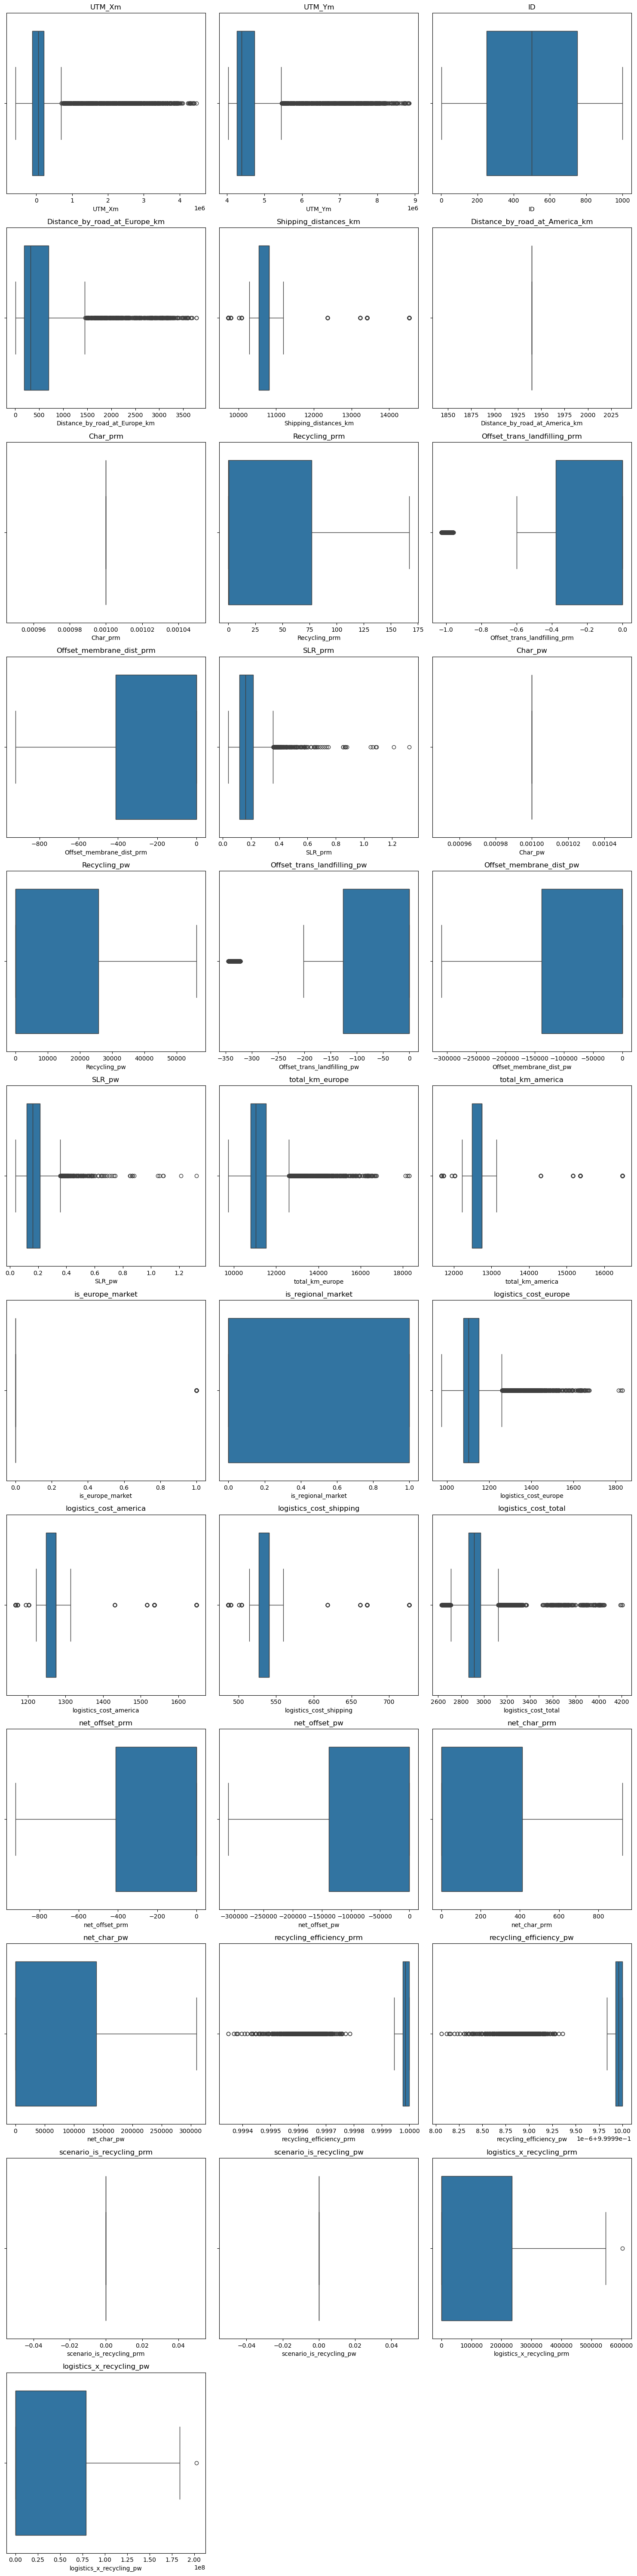

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

plots_per_row = 3
num_plots = len(num_cols)
num_rows = (num_plots // plots_per_row) + (num_plots % plots_per_row > 0)  # Calculate rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(col)

for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('outlier.png')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   UTM_Xm                          5000 non-null   float64 
 1   UTM_Ym                          5000 non-null   float64 
 2   Market                          5000 non-null   category
 3   ID                              5000 non-null   int64   
 4   Provider                        5000 non-null   category
 5   Distance_by_road_at_Europe_km   5000 non-null   float64 
 6   Nearest_port                    5000 non-null   object  
 7   Shipping_distances_km           5000 non-null   float64 
 8   Distance_by_road_at_America_km  5000 non-null   float64 
 9   Plant_location                  5000 non-null   object  
 10  Abr_prm                         5000 non-null   object  
 11  Scenario_prm                    5000 non-null   category
 12  Char_prm            

In [12]:
def cap_outliers(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower, upper)
            print(f"{col} capped between {round(lower, 2)} and {round(upper, 2)}")
    return df

# Columns to fix
columns_to_fix = [
    "total_km_europe",
    "logistics_cost_europe",
    "logistics_cost_total",
    "recycling_efficiency_pw",
    "recycling_efficiency_prm"
]

# Apply the fix
df = cap_outliers(df, columns_to_fix)

total_km_europe capped between 9701.01 and 12605.38
logistics_cost_europe capped between 970.1 and 1260.54
logistics_cost_total capped between 2709.97 and 3124.6
recycling_efficiency_pw capped between 1.0 and 1.0
recycling_efficiency_prm capped between 1.0 and 1.0


In [13]:
# 📊 Step 3: Summary Tables
def summary_table(by, vals):
    present = [v for v in vals if v in df.columns]
    if by in df.columns and present:
        return df.groupby(by)[present].agg(["mean", "median", "std", "min", "max", "count"])
    return None

summary_metrics = ["SLR_prm", "Char_prm", "Recycling_prm", "SLR_pw", "Char_pw", "Recycling_pw"]
table_market = summary_table("Market", summary_metrics)
table_provider = summary_table("Provider", summary_metrics)

# Display summary tables
print("Summary by Market:")
print(table_market)

print("\nSummary by Provider:")
print(table_provider)

Summary by Market:
           SLR_prm                                               Char_prm  \
              mean    median       std       min       max count     mean   
Market                                                                      
European  0.205065  0.183367  0.102624  0.044638  1.212318  1000    0.001   
Iberian   0.154669  0.137207  0.080703  0.039713  1.047476  2000    0.001   
Regional  0.192868  0.170739  0.099740  0.048332  1.322054  2000    0.001   

                             ... Char_pw                      Recycling_pw  \
         median  std    min  ...     std    min    max count          mean   
Market                       ...                                             
European  0.001  0.0  0.001  ...     0.0  0.001  0.001  1000  28498.769911   
Iberian   0.001  0.0  0.001  ...     0.0  0.001  0.001  2000     10.504402   
Regional  0.001  0.0  0.001  ...     0.0  0.001  0.001  2000  14515.960613   

                                                 

C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1123793672.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by)[present].agg(["mean", "median", "std", "min", "max", "count"])
C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1123793672.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by)[present].agg(["mean", "median", "std", "min", "max", "count"])


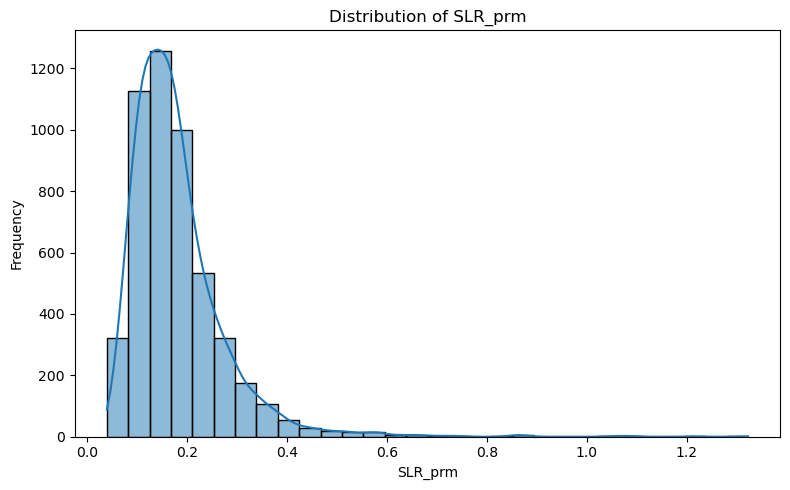

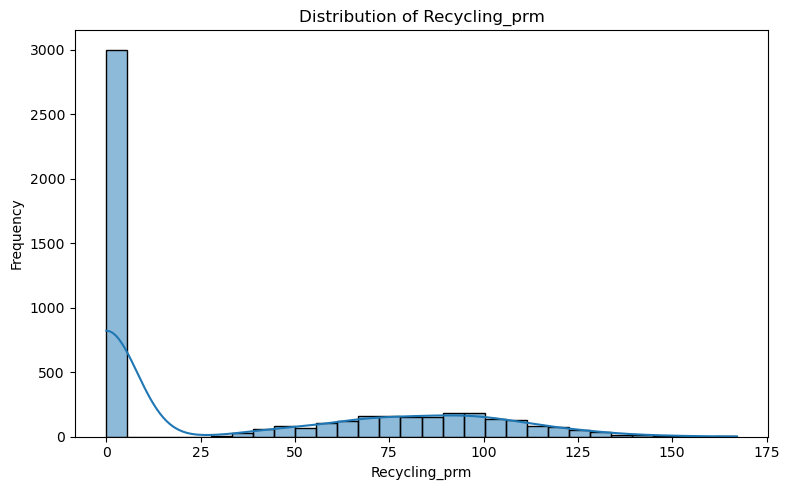

In [14]:
import seaborn as sns

for col in ["SLR_prm", "Recycling_prm"]:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        #plt.savefig('distribution of target.png')
        plt.show()

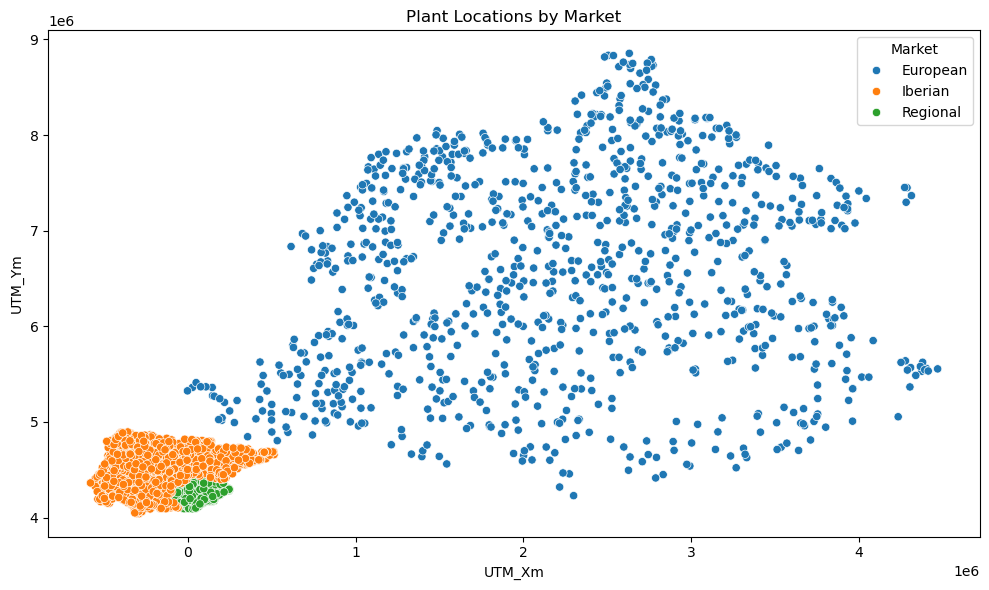

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="UTM_Xm", y="UTM_Ym", hue="Market")
plt.title("Plant Locations by Market")
plt.xlabel("UTM_Xm")
plt.ylabel("UTM_Ym")
plt.tight_layout()
plt.savefig('Plant Locations by Market.png')
plt.show()

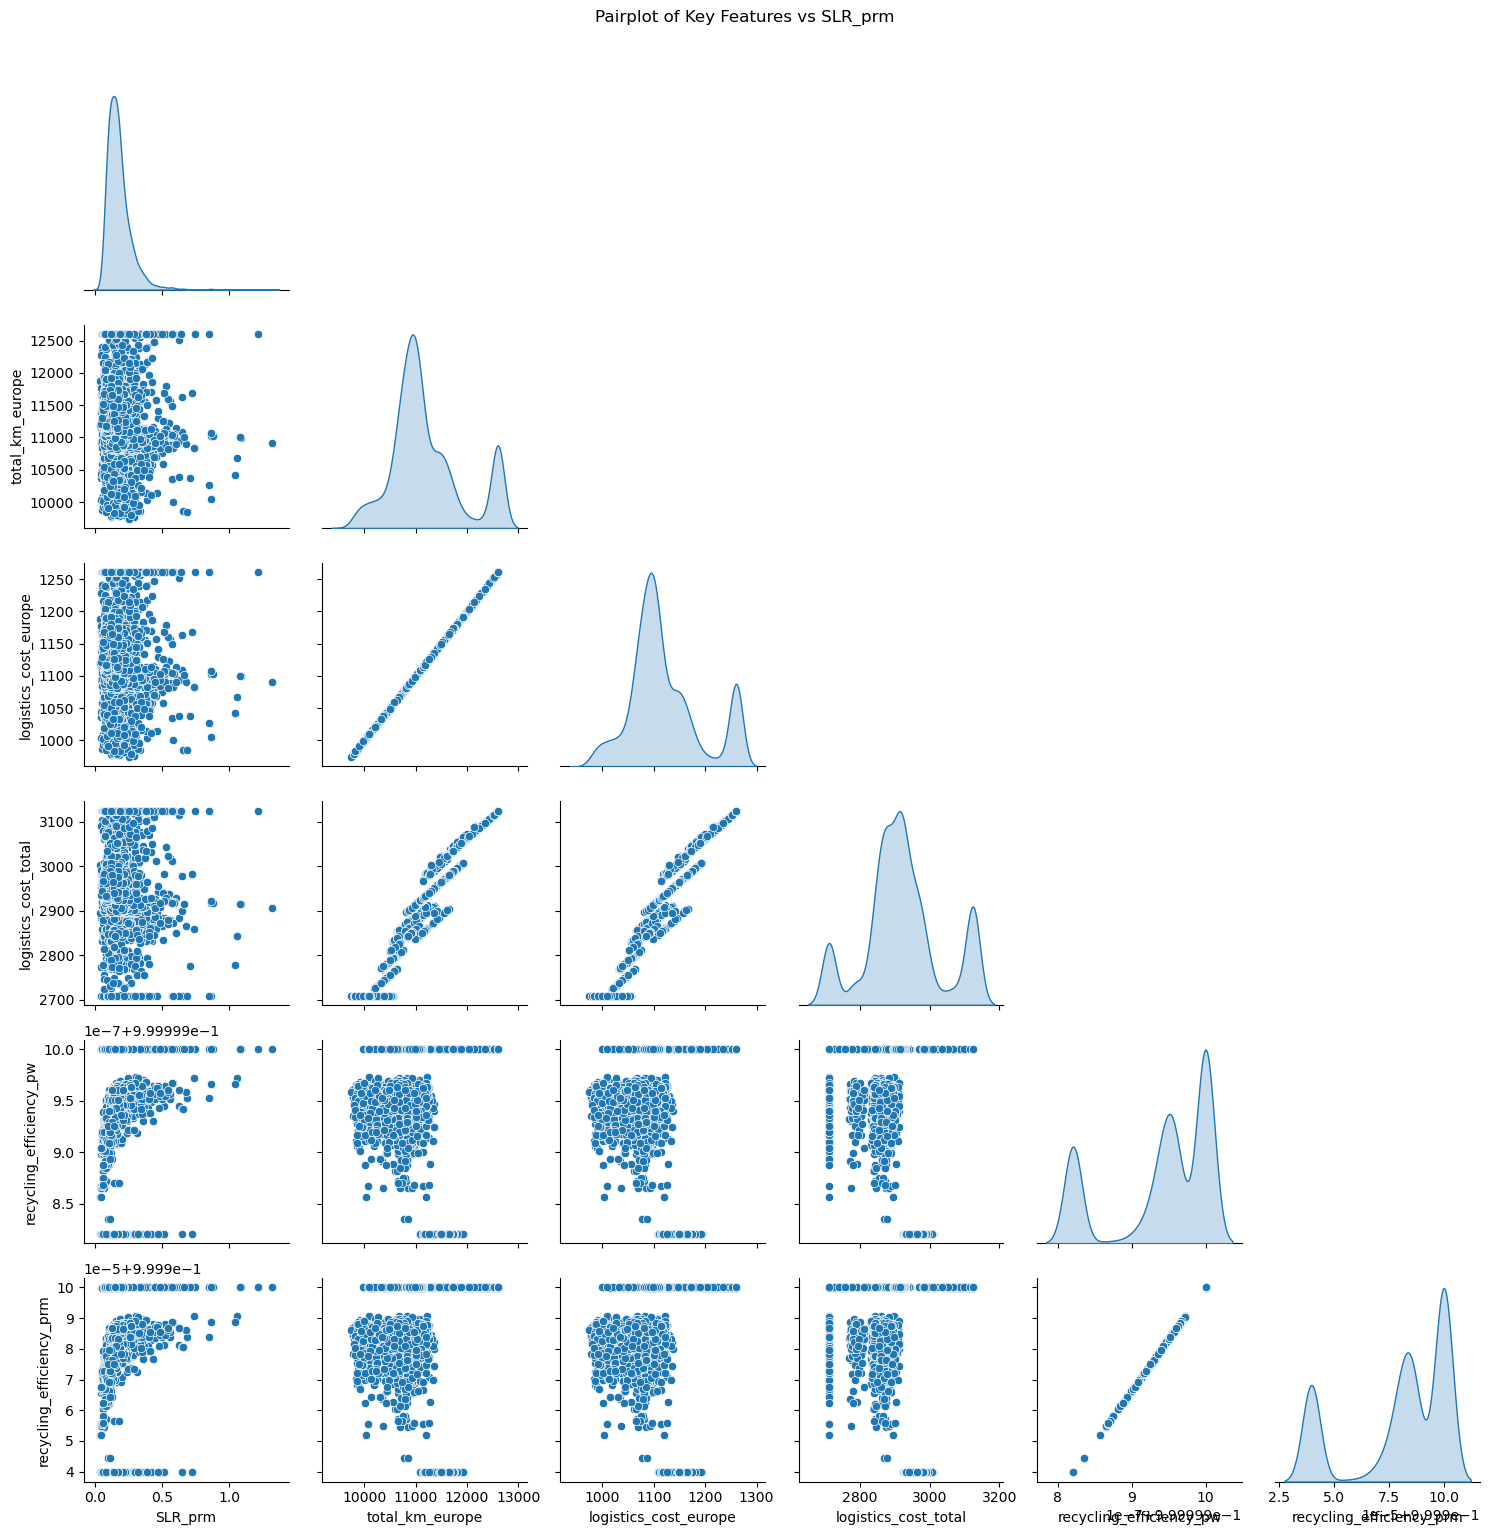

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns including your target
pairplot_cols = [
    "SLR_prm",
    "total_km_europe",
    "logistics_cost_europe",
    "logistics_cost_total",
    "recycling_efficiency_pw",
    "recycling_efficiency_prm"
]

# Optional: drop rows with missing values in these columns
df_pair = df[pairplot_cols].dropna()

# Create the pairplot
sns.pairplot(df_pair, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Key Features vs SLR_prm", y=1.02)
plt.tight_layout()
plt.savefig('Pairplot of Key Features vs SLR_prm.png')
plt.show()

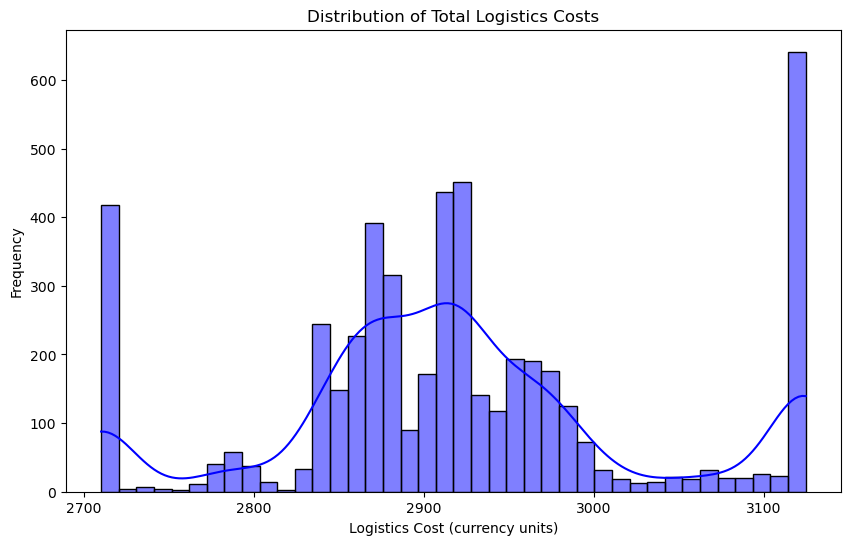

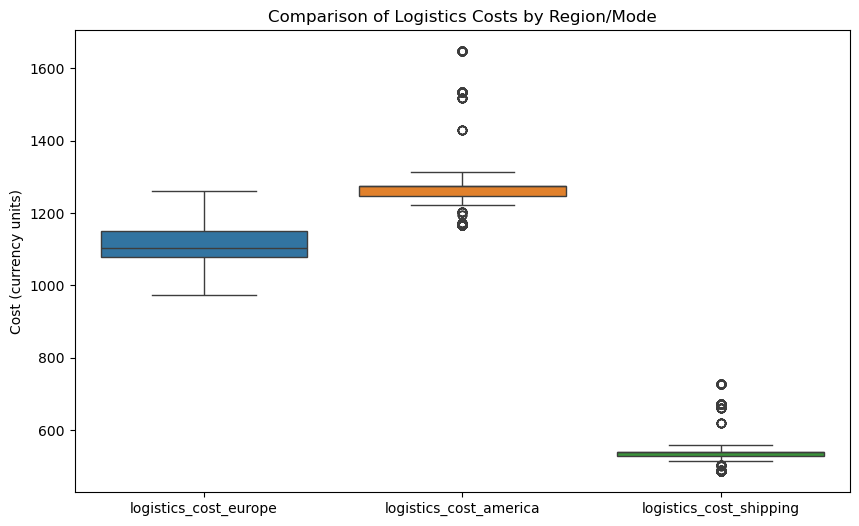

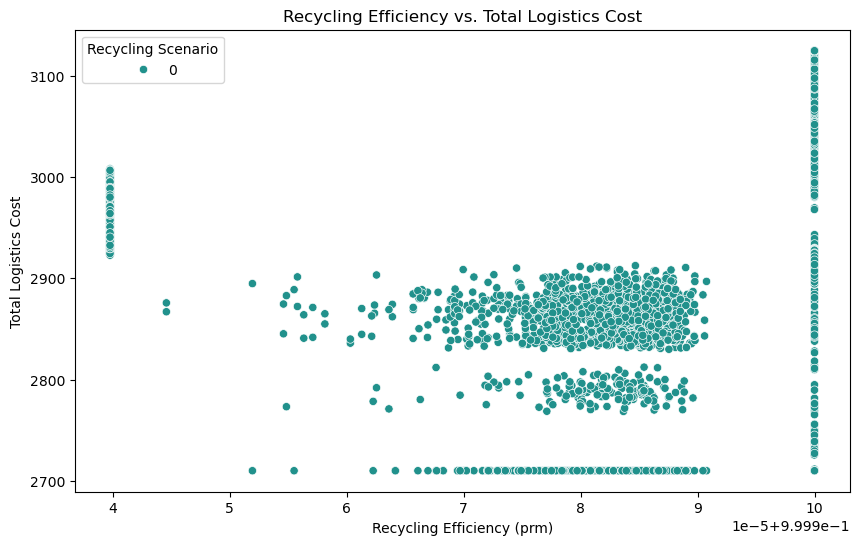

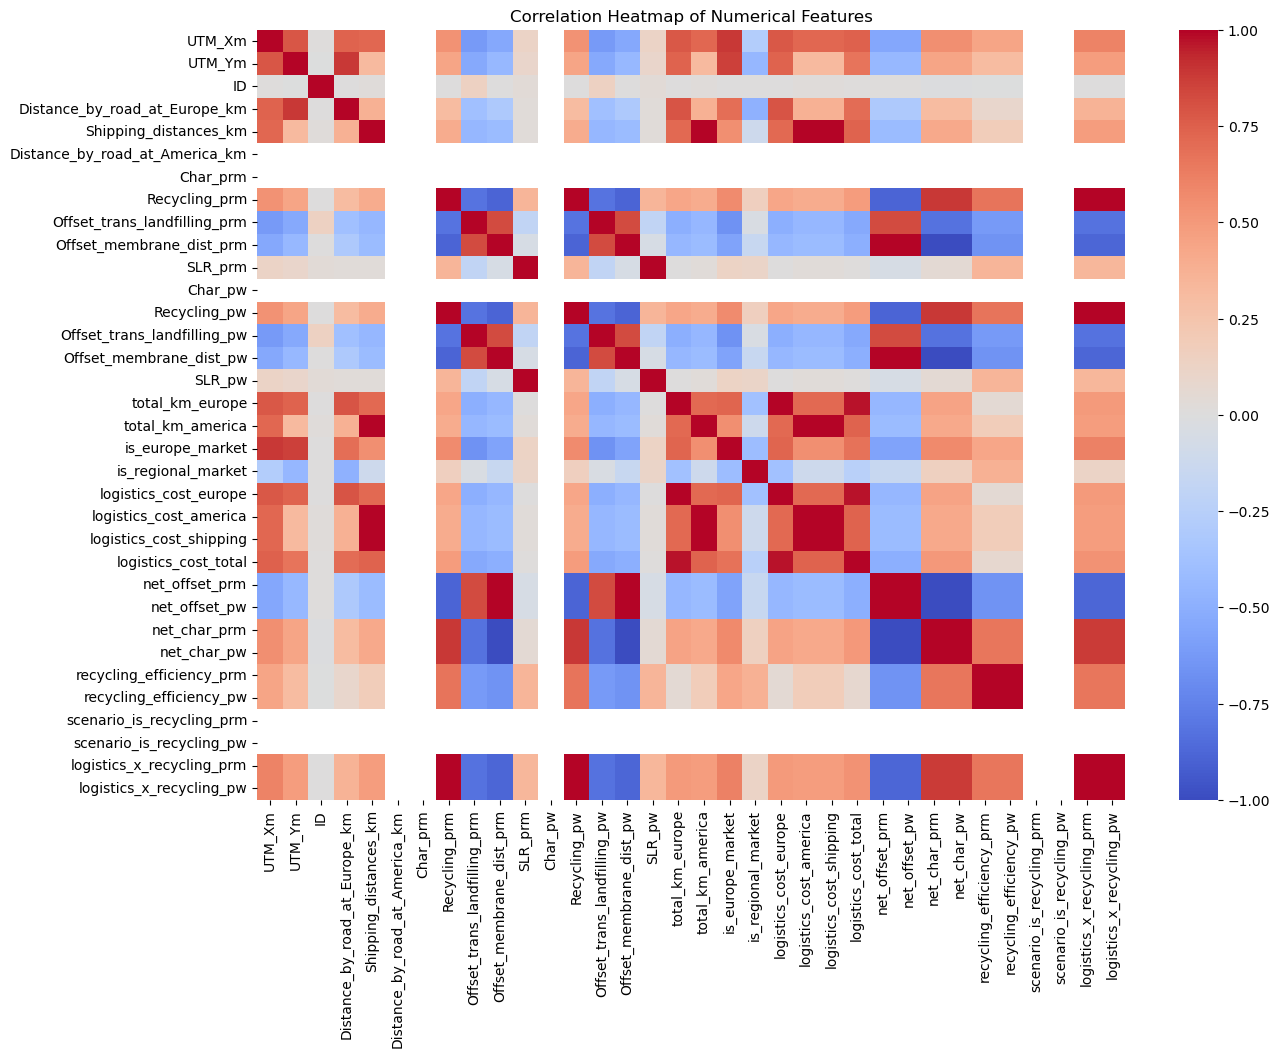

<Figure size 1000x600 with 0 Axes>

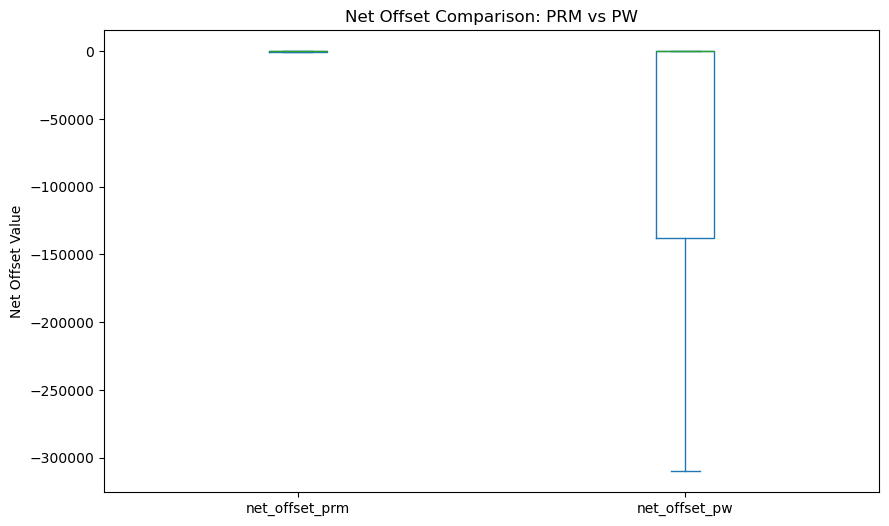

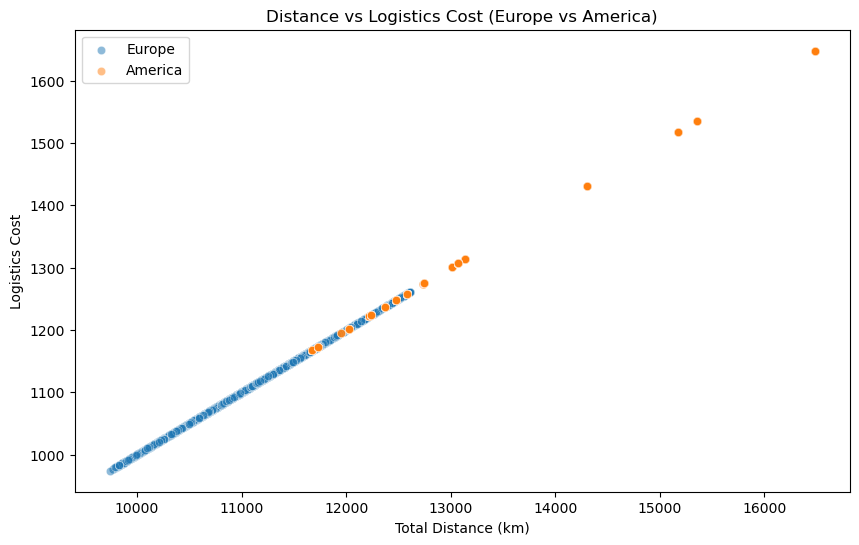

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of logistics costs
plt.figure(figsize=(10,6))
sns.histplot(df['logistics_cost_total'], bins=40, kde=True, color="blue")
plt.title("Distribution of Total Logistics Costs")
plt.xlabel("Logistics Cost (currency units)")
plt.ylabel("Frequency")
plt.show()

# 2. Compare Europe vs. America logistics costs
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['logistics_cost_europe', 'logistics_cost_america', 'logistics_cost_shipping']])
plt.title("Comparison of Logistics Costs by Region/Mode")
plt.ylabel("Cost (currency units)")
plt.show()

# 3. Recycling efficiency vs logistics cost trade-off
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['recycling_efficiency_prm'], y=df['logistics_cost_total'], hue=df['scenario_is_recycling_prm'], palette="viridis")
plt.title("Recycling Efficiency vs. Total Logistics Cost")
plt.xlabel("Recycling Efficiency (prm)")
plt.ylabel("Total Logistics Cost")
plt.legend(title="Recycling Scenario")
plt.show()

# 4. Correlation heatmap (to see important drivers)
plt.figure(figsize=(14,10))
num_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig('heatmap_new.png')
plt.show()

# 5. Scenario comparison (PRM vs PW net offsets)
plt.figure(figsize=(10,6))
df[['net_offset_prm', 'net_offset_pw']].plot(kind='box', figsize=(10,6))
plt.title("Net Offset Comparison: PRM vs PW")
plt.ylabel("Net Offset Value")
plt.show()

# 6. Trend: Distance vs Cost (showing how transport drives TEA)
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_km_europe', y='logistics_cost_europe', data=df, alpha=0.5, label="Europe")
sns.scatterplot(x='total_km_america', y='logistics_cost_america', data=df, alpha=0.5, label="America")
plt.title("Distance vs Logistics Cost (Europe vs America)")
plt.xlabel("Total Distance (km)")
plt.ylabel("Logistics Cost")
plt.legend()
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Market", y="logistics_cost_total", estimator="mean", ci=None, palette="Blues")
C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Market", y="logistics_cost_total", estimator="mean", ci=None, palette="Blues")


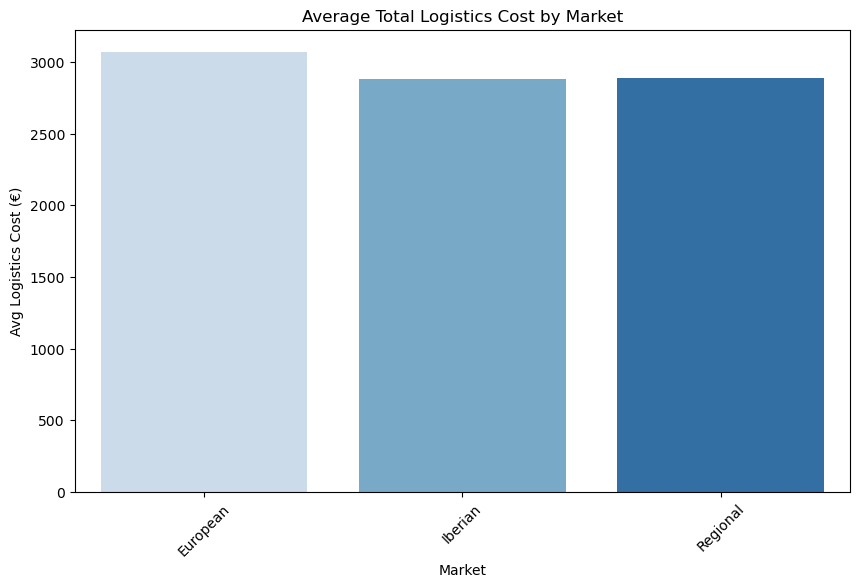

C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Provider", y="recycling_efficiency_prm", estimator="mean", ci=None, palette="Greens")
C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Provider", y="recycling_efficiency_prm", estimator="mean", ci=None, palette="Greens")


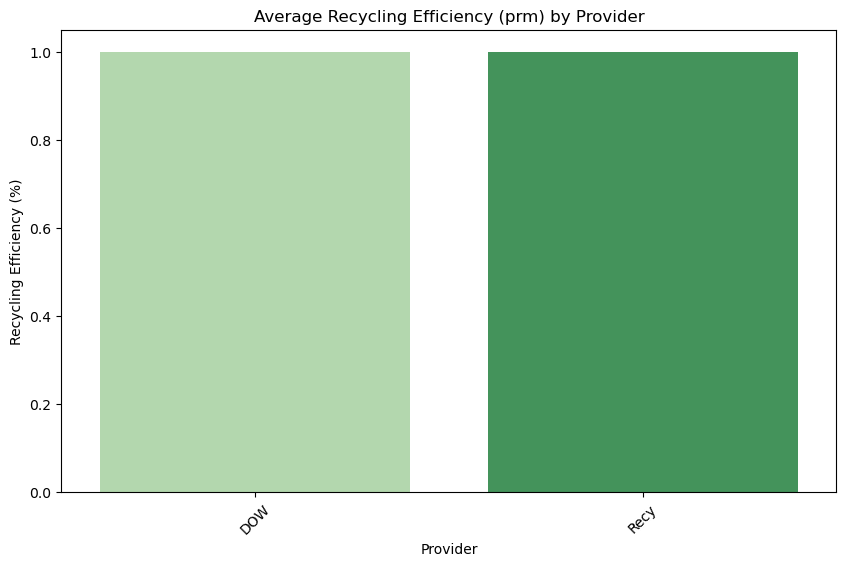

C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Plant_location", y="net_offset_prm", estimator="mean", ci=None, palette="coolwarm")
C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Plant_location", y="net_offset_prm", estimator="mean", ci=None, palette="coolwarm")


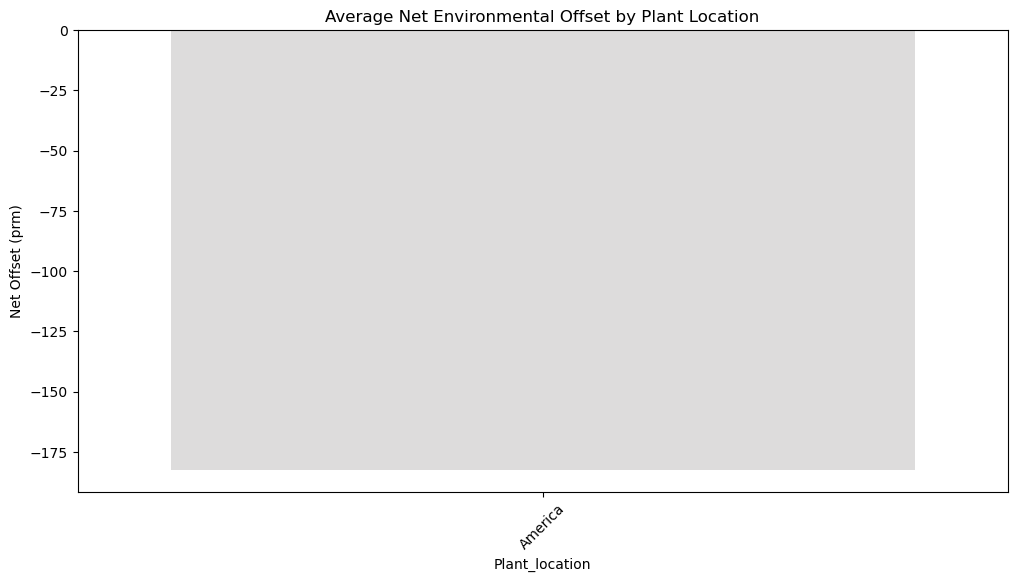

C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Market", y="SLR_prm", estimator="mean", ci=None, palette="Oranges")
C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Market", y="SLR_prm", estimator="mean", ci=None, palette="Oranges")


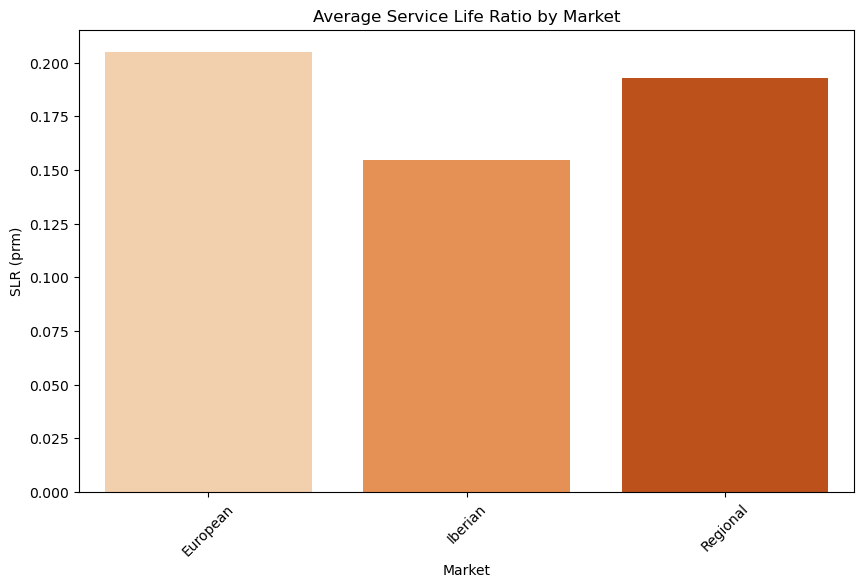

C:\Users\abdul\AppData\Local\Temp\ipykernel_15432\1729595599.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Market", y="logistics_cost_total", hue="scenario_is_recycling_prm", estimator="mean", ci=None, palette="Set2")


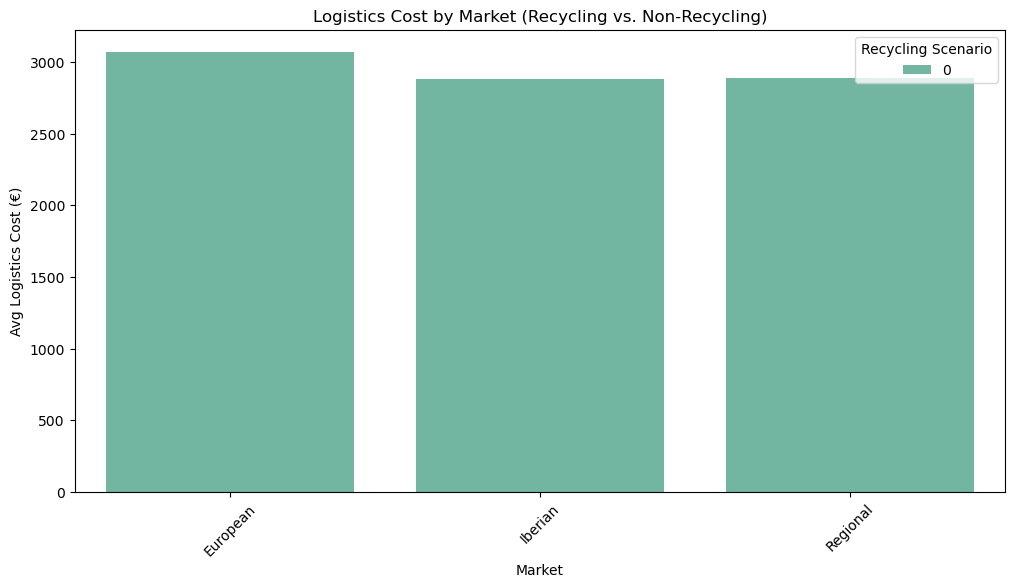

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Market", y="logistics_cost_total", estimator="mean", ci=None, palette="Blues")
plt.title("Average Total Logistics Cost by Market")
plt.ylabel("Avg Logistics Cost (€)")
plt.xticks(rotation=45)
plt.savefig('Average Total Logistics Cost by Market.png')
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Provider", y="recycling_efficiency_prm", estimator="mean", ci=None, palette="Greens")
plt.title("Average Recycling Efficiency (prm) by Provider")
plt.ylabel("Recycling Efficiency (%)")
plt.xticks(rotation=45)

plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Plant_location", y="net_offset_prm", estimator="mean", ci=None, palette="coolwarm")
plt.title("Average Net Environmental Offset by Plant Location")
plt.ylabel("Net Offset (prm)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Market", y="SLR_prm", estimator="mean", ci=None, palette="Oranges")
plt.title("Average Service Life Ratio by Market")
plt.ylabel("SLR (prm)")
plt.xticks(rotation=45)
plt.savefig('Average Service Life Ratio by Market.png')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Market", y="logistics_cost_total", hue="scenario_is_recycling_prm", estimator="mean", ci=None, palette="Set2")
plt.title("Logistics Cost by Market (Recycling vs. Non-Recycling)")
plt.ylabel("Avg Logistics Cost (€)")
plt.xticks(rotation=45)
plt.legend(title="Recycling Scenario")
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   UTM_Xm                          5000 non-null   float64 
 1   UTM_Ym                          5000 non-null   float64 
 2   Market                          5000 non-null   category
 3   ID                              5000 non-null   int64   
 4   Provider                        5000 non-null   category
 5   Distance_by_road_at_Europe_km   5000 non-null   float64 
 6   Nearest_port                    5000 non-null   object  
 7   Shipping_distances_km           5000 non-null   float64 
 8   Distance_by_road_at_America_km  5000 non-null   float64 
 9   Plant_location                  5000 non-null   object  
 10  Abr_prm                         5000 non-null   object  
 11  Scenario_prm                    5000 non-null   category
 12  Char_prm            

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = df.drop(["SLR_prm", "SLR_pw"], axis=1)   # drop target columns
y = df["SLR_prm"]   # choose one target (use "SLR_pw" if needed)

# Convert categorical (string) columns into numeric (dummy variables)
X = pd.get_dummies(X, drop_first=True)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

best_model = None
best_rmse = float("inf")
best_r2 = float("-inf")

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:\n RMSE: {rmse:.4f}\n R²: {r2:.4f}\n")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_model = name

print(f"\nBest Model: {best_model}\n Best RMSE: {best_rmse:.4f}\n Best R²: {best_r2:.4f}")

Linear Regression:
 RMSE: 0.0773
 R²: 0.5168

Ridge Regression:
 RMSE: 0.0782
 R²: 0.5052

Support Vector Regression:
 RMSE: 0.0809
 R²: 0.4708

Gradient Boosting Regressor:
 RMSE: 0.0199
 R²: 0.9678

K-Nearest Neighbors:
 RMSE: 0.0826
 R²: 0.4474

Random Forest Regressor:
 RMSE: 0.0193
 R²: 0.9697

Decision Tree Regressor:
 RMSE: 0.0224
 R²: 0.9593


Best Model: Random Forest Regressor
 Best RMSE: 0.0193
 Best R²: 0.9697


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Cross-validated R²:", np.mean(scores))

Cross-validated R²: -0.22852879760617162


In [29]:
import joblib
best_model = name
best_model_name = name
# Save the best model and scaler
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"\nBest Model: {best_model_name}\nSaved as: {best_model_name.replace(' ', '_').lower()}_model.pkl")

NameError: name 'best_model_name' is not defined

In [22]:
# Refit best model on full dataset
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [23]:
# Simulate future scenario
future_df = df.copy()
future_df["recycling_efficiency_prm"] += 10  # Assume 10% improvement
future_df["logistics_cost_total"] *= 0.9     # Assume 10% cost reduction

# Apply one-hot encoding
future_encoded = pd.get_dummies(future_df)

# Align with training feature structure
future_encoded = future_encoded.reindex(columns=X.columns, fill_value=0)

# Scale numeric features
future_scaled = scaler.transform(future_encoded)

# Predict
future_predictions = final_model.predict(future_scaled)

# Add predictions to future_df
future_df["Predicted_SLR_prm"] = future_predictions

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


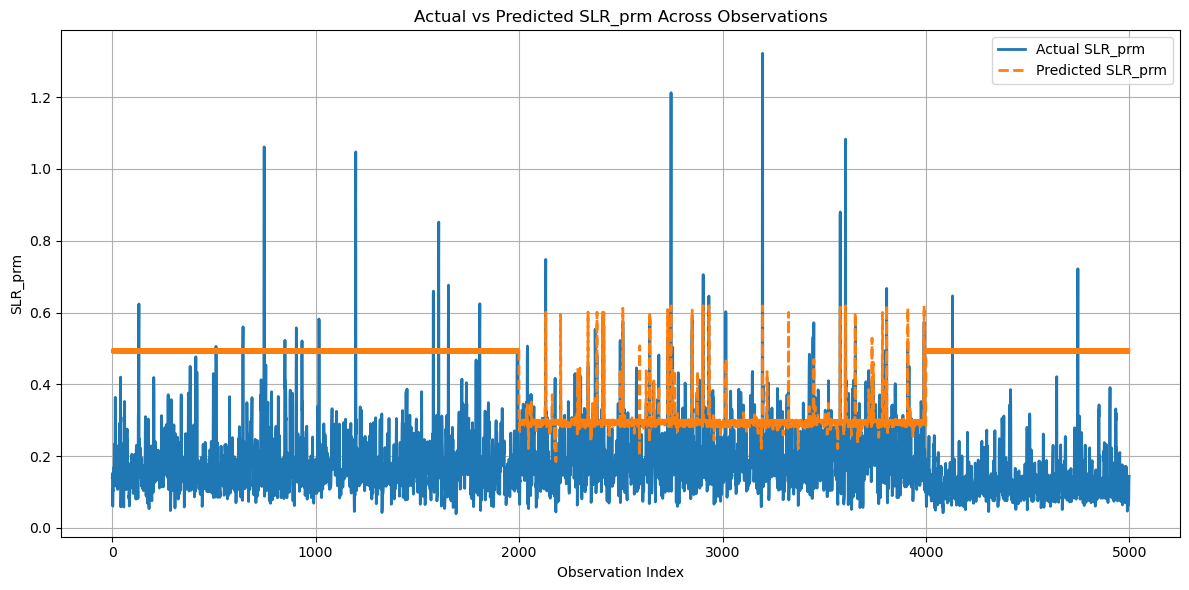

In [25]:
import matplotlib.pyplot as plt

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    "Actual_SLR_prm": y,
    "Predicted_SLR_prm": final_model.predict(scaler.transform(X))
})

# Plot both lines
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["Actual_SLR_prm"].values, label="Actual SLR_prm", linewidth=2)
plt.plot(comparison_df["Predicted_SLR_prm"].values, label="Predicted SLR_prm", linewidth=2, linestyle="--")
plt.title("Actual vs Predicted SLR_prm Across Observations")
plt.xlabel("Observation Index")
plt.ylabel("SLR_prm")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


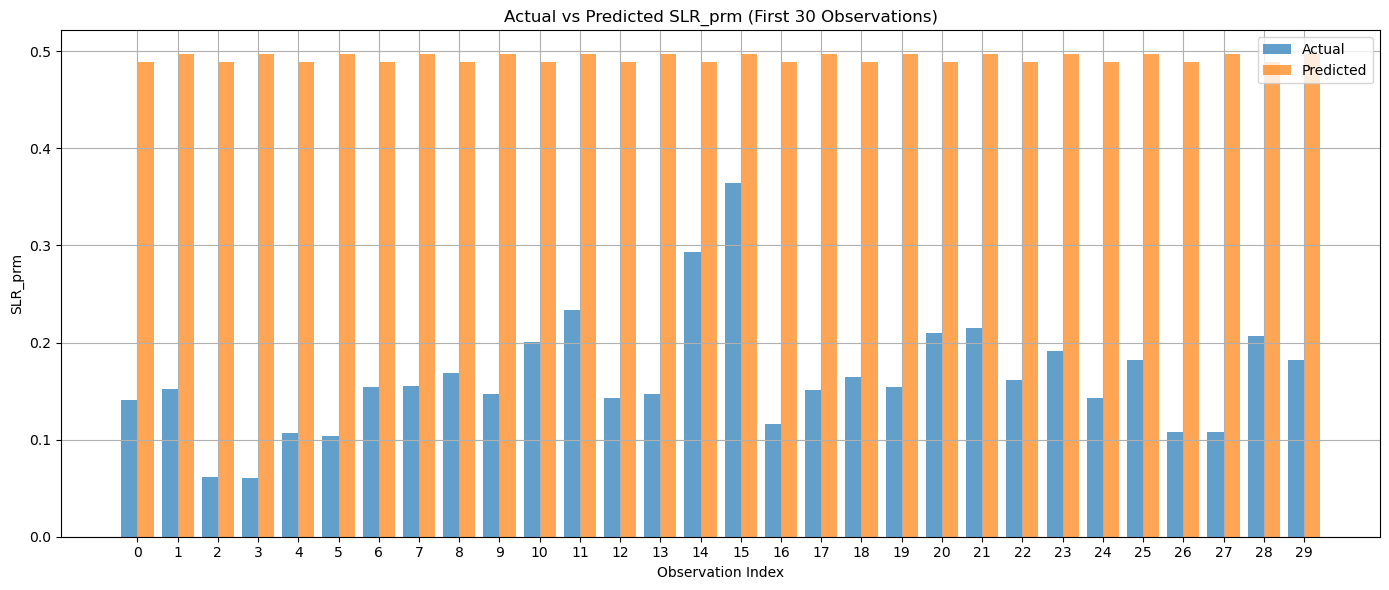

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    "Actual_SLR_prm": y,
    "Predicted_SLR_prm": final_model.predict(scaler.transform(X))
})

# Select a subset (e.g., first 30 observations)
subset = comparison_df.head(30)

# Set up bar positions
indices = np.arange(len(subset))
bar_width = 0.4

# Plot side-by-side bars
plt.figure(figsize=(14, 6))
plt.bar(indices, subset["Actual_SLR_prm"], width=bar_width, label="Actual", alpha=0.7)
plt.bar(indices + bar_width, subset["Predicted_SLR_prm"], width=bar_width, label="Predicted", alpha=0.7)

# Formatting
plt.title("Actual vs Predicted SLR_prm (First 30 Observations)")
plt.xlabel("Observation Index")
plt.ylabel("SLR_prm")
plt.xticks(indices + bar_width / 2, indices)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('Actual vs Predicted SLR_prm (First 30 Observations).png')
plt.show()

In [27]:
# Add predictions to your original DataFrame
df["Predicted_SLR_prm"] = final_model.predict(scaler.transform(X))

# Save to CSV
df.to_csv("predicted_slr_prm.csv", index=False)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


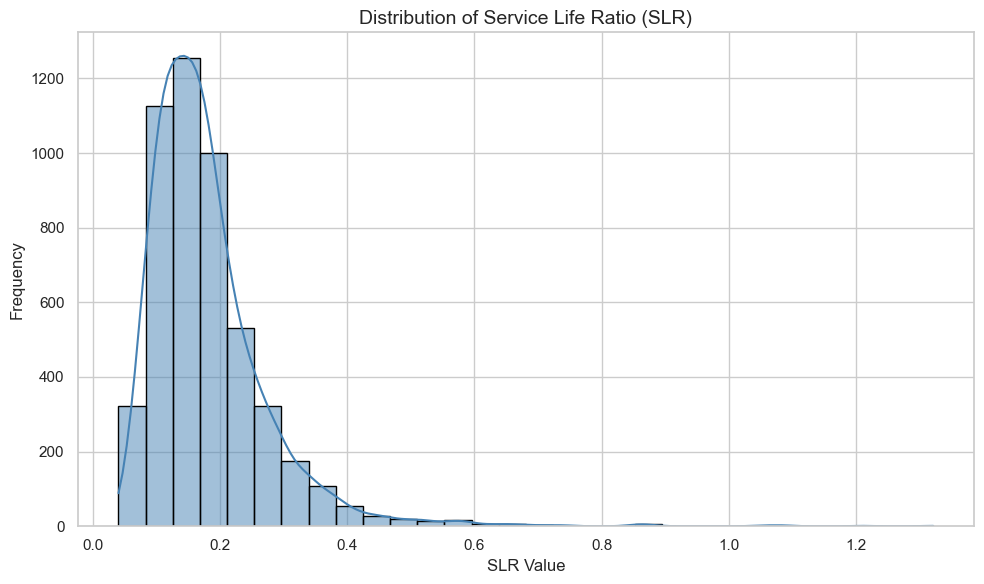

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df["SLR_prm"], bins=30, kde=True, color="steelblue", edgecolor="black")

# Add titles and labels
plt.title("Distribution of Service Life Ratio (SLR)", fontsize=14)
plt.xlabel("SLR Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.savefig('Distribution of Service Life Ratio.png')
plt.show()
